In [1]:
%load_ext nb_black


<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
import csv
from scipy.stats import linregress
from citipy import citipy
from apy_keys import weather_apy_key

lat_range = (-90, 90)
lng_range = (-180, 180)

output_data_file = "../output_data/cities.csv"


<IPython.core.display.Javascript object>

In [3]:
lat_lngs = []
cities = []

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    if city not in cities:
        cities.append(city)
number_of_cities = len(cities)


<IPython.core.display.Javascript object>

In [4]:
number_of_cities

603

<IPython.core.display.Javascript object>

In [5]:
# retrieve the weather for each city
# create a list and save each iteration to it of
# lat, lng, max temp, humidity, cloudiness, wind speed, country
# and date
# export cities into a .csv
# transform it into a dataframe

<IPython.core.display.Javascript object>

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_apy_key + "&q=" + "los angeles" + "&units=metric"
query_response = requests.get(query_url).json()
query_response

{'coord': {'lon': -118.2437, 'lat': 34.0522},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 18.78,
  'feels_like': 17.81,
  'temp_min': 13.99,
  'temp_max': 24.79,
  'pressure': 1016,
  'humidity': 42},
 'visibility': 10000,
 'wind': {'speed': 5.14, 'deg': 260},
 'clouds': {'all': 0},
 'dt': 1645319957,
 'sys': {'type': 1,
  'id': 3694,
  'country': 'US',
  'sunrise': 1645281212,
  'sunset': 1645321223},
 'timezone': -28800,
 'id': 5368361,
 'name': 'Los Angeles',
 'cod': 200}

<IPython.core.display.Javascript object>

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
 
print("Beginning Data Retrieval \n\n------------------------------")

# if 60 calls time.sleep

count = 0
set_count = 1
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_ = []

for city in cities: 

    if count % 60 == 0 and count > 0:
        set_count = set_count + 1
        count = 0
#         break
        time.sleep(60)
    else:
        query_url = url+"appid="+weather_apy_key+"&q=" + city + "&units=metric"
        query_response = requests.get(query_url).json()
        try:
            count = count + 1
            print(f"Processing Record {count} of Set {set_count} | {city}")
            lat.append(query_response['coord']['lat'])
            city_.append(query_response['name'])
            lng.append(query_response['coord']['lon'])
            max_temp.append(query_response['main']['temp_max'])
            humidity.append(query_response['main']['humidity'])
            cloudiness.append(query_response["clouds"]["all"])
            wind_speed.append(query_response['wind']['speed'])
            country.append(query_response['sys']['country'])
            date.append(query_response['dt'])
        except (KeyError, IndexError):
            print(f"City {city} not found. Skipping...")
            continue

print(f"------------------------------\nData Retrieval Complete\n------------------------------")


Beginning Data Retrieval 

------------------------------
Processing Record 1 of Set 1 | ciprian porumbescu
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | constitucion
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | puerto ayacucho
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | saskylakh
Processing Record 9 of Set 1 | svolvaer
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | cabadiangan
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | victoria
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | bako
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | akropong
Processing Record 21 of Set 1 | kahului
Processing Record 22 of Set 1 | taolanaro
City taolanaro not fo

Processing Record 3 of Set 4 | grefrath
Processing Record 4 of Set 4 | tabou
Processing Record 5 of Set 4 | lata
Processing Record 6 of Set 4 | clyde river
Processing Record 7 of Set 4 | castro
Processing Record 8 of Set 4 | kavieng
Processing Record 9 of Set 4 | lazaro cardenas
Processing Record 10 of Set 4 | necochea
Processing Record 11 of Set 4 | sitka
Processing Record 12 of Set 4 | chipiona
Processing Record 13 of Set 4 | bambous virieux
Processing Record 14 of Set 4 | ancud
Processing Record 15 of Set 4 | girne
Processing Record 16 of Set 4 | eureka
Processing Record 17 of Set 4 | egvekinot
Processing Record 18 of Set 4 | narsaq
Processing Record 19 of Set 4 | katherine
Processing Record 20 of Set 4 | queenstown
Processing Record 21 of Set 4 | college
Processing Record 22 of Set 4 | tubuala
Processing Record 23 of Set 4 | torbay
Processing Record 24 of Set 4 | provideniya
Processing Record 25 of Set 4 | lebu
Processing Record 26 of Set 4 | saint george
Processing Record 27 of Se

Processing Record 10 of Set 7 | masoko
Processing Record 11 of Set 7 | voh
Processing Record 12 of Set 7 | marawi
Processing Record 13 of Set 7 | paso de los toros
Processing Record 14 of Set 7 | safaga
Processing Record 15 of Set 7 | kandrian
Processing Record 16 of Set 7 | denpasar
Processing Record 17 of Set 7 | williams lake
Processing Record 18 of Set 7 | atambua
Processing Record 19 of Set 7 | toliary
City toliary not found. Skipping...
Processing Record 20 of Set 7 | walker
Processing Record 21 of Set 7 | mapastepec
Processing Record 22 of Set 7 | vilyuysk
Processing Record 23 of Set 7 | portland
Processing Record 24 of Set 7 | wattegama
Processing Record 25 of Set 7 | port alfred
Processing Record 26 of Set 7 | tukrah
Processing Record 27 of Set 7 | haftoni
Processing Record 28 of Set 7 | fukue
Processing Record 29 of Set 7 | bandarbeyla
Processing Record 30 of Set 7 | kualakapuas
Processing Record 31 of Set 7 | lev tolstoy
Processing Record 32 of Set 7 | berlevag
Processing Re

Processing Record 11 of Set 10 | jizan
Processing Record 12 of Set 10 | praia
Processing Record 13 of Set 10 | middle island
Processing Record 14 of Set 10 | attawapiskat
City attawapiskat not found. Skipping...
Processing Record 15 of Set 10 | audincourt
Processing Record 16 of Set 10 | leninsk
Processing Record 17 of Set 10 | kindu
Processing Record 18 of Set 10 | damietta
Processing Record 19 of Set 10 | barbar
City barbar not found. Skipping...
Processing Record 20 of Set 10 | machalpur
Processing Record 21 of Set 10 | cabedelo
Processing Record 22 of Set 10 | saint-louis
Processing Record 23 of Set 10 | perth
Processing Record 24 of Set 10 | belaya gora
Processing Record 25 of Set 10 | premnitz
Processing Record 26 of Set 10 | margate
Processing Record 27 of Set 10 | kavaratti
Processing Record 28 of Set 10 | chaman
Processing Record 29 of Set 10 | nouakchott
Processing Record 30 of Set 10 | cockburn town
Processing Record 31 of Set 10 | marsa matruh
Processing Record 32 of Set 10

<IPython.core.display.Javascript object>

In [14]:
combination_of_lists = zip(city_,lat, lng, max_temp,humidity,cloudiness,wind_speed,country,date)

with open(output_data_file, "w") as datafile:
    writer = csv.writer(datafile)
    writer.writerow(["City","Lat","Lng", "Max Temp", "Humidity", "Cloudiness"," Wind Speed", "Country","Date"])
    writer.writerows(combination_of_lists)


<IPython.core.display.Javascript object>

In [15]:
df = pd.read_csv(output_data_file, delimiter=",")
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ciprian Porumbescu,47.5667,26.0667,2.92,69,100,2.60,RO,1645320523
1,Barrow,71.2906,-156.7887,-31.99,68,0,5.14,US,1645320523
2,Albany,42.6001,-73.9662,-5.86,65,81,2.24,US,1645320245
3,Constitución,-35.3333,-72.4167,15.25,87,0,6.41,CL,1645320356
4,Rikitea,-23.1203,-134.9692,26.14,66,0,5.21,PF,1645320407


<IPython.core.display.Javascript object>

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         542 non-null    object 
 1   Lat          542 non-null    float64
 2   Lng          542 non-null    float64
 3   Max Temp     542 non-null    float64
 4   Humidity     542 non-null    int64  
 5   Cloudiness   542 non-null    int64  
 6    Wind Speed  542 non-null    float64
 7   Country      540 non-null    object 
 8   Date         542 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 38.2+ KB


<IPython.core.display.Javascript object>

In [17]:
df["Humidity"].max()

100

<IPython.core.display.Javascript object>

In [18]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02
mean,21.102572,15.343481,10.014391,73.996310,60.319188,4.076458,1.645321e+09
std,33.148022,91.666559,16.975950,20.081994,40.652256,3.125568,2.488202e+02
min,-54.800000,-179.166700,-36.040000,11.000000,0.000000,0.000000,1.645320e+09
25%,-6.216700,-63.189425,-1.885000,65.000000,17.000000,1.892500,1.645321e+09
50%,25.194550,20.570300,15.790000,78.000000,75.000000,3.290000,1.645321e+09
75%,48.895525,98.704725,24.075000,90.000000,100.000000,5.500000,1.645321e+09
max,78.218600,179.316700,37.040000,100.000000,100.000000,20.480000,1.645321e+09


<IPython.core.display.Javascript object>

Q1 is 65.0
Q2 is 78.0 
Q3 is 90.0
The potential outlier is below 52.5.


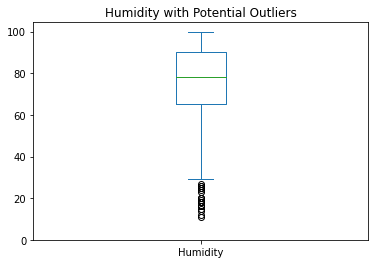

<IPython.core.display.Javascript object>

In [22]:
df["Humidity"].plot(kind="box", ylim=0, title="Humidity with Potential Outliers")
q3 = df["Humidity"].quantile(q=0.75)
q2 = df["Humidity"].quantile(q=0.50)
q1 = df["Humidity"].quantile(q=0.25)
iqr = q3 - q1
upper_quartile = q3 + 1.5 * iqr
lower_quartile = q3 - 1.5 * iqr
print(f"Q1 is {q1}\nQ2 is {q2} \nQ3 is {q3}")
print(f"The potential outlier is below {lower_quartile}.")
lower_q_values = df.loc[df["Humidity"] <= lower_quartile, "Humidity"]
df_clean = df[df["Humidity"].isin(lower_q_values) == False]

<AxesSubplot:title={'center':'Humidity with no Potential Outliers'}>

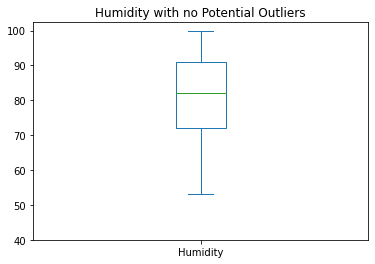

<IPython.core.display.Javascript object>

In [23]:
df_clean["Humidity"].plot(
    kind="box", ylim=40, title="Humidity with no Potential Outliers"
)

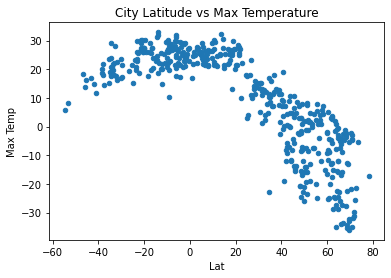

<IPython.core.display.Javascript object>

In [36]:
lat_vs_temp = df_clean.plot(
    x="Lat", y="Max Temp", kind="scatter", title="City Latitude vs Max Temperature"
)
plt.savefig('../output_data/plot1.png')


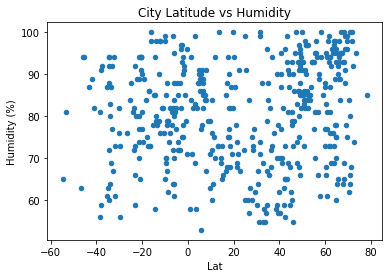

<IPython.core.display.Javascript object>

In [40]:
lat_vs_hum = df_clean.plot(
    x="Lat",
    y="Humidity",
    kind="scatter",
    title="City Latitude vs Humidity",
    ylabel="Humidity (%)",
)
plt.savefig("../output_data/plot2.png")

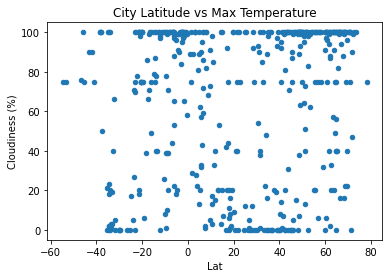

<IPython.core.display.Javascript object>

In [41]:
lat_vs_clou = df_clean.plot(
    x="Lat",
    y="Cloudiness",
    kind="scatter",
    title="City Latitude vs C",
    ylabel="Cloudiness (%)",
)
plt.savefig("../output_data/plot3.png")

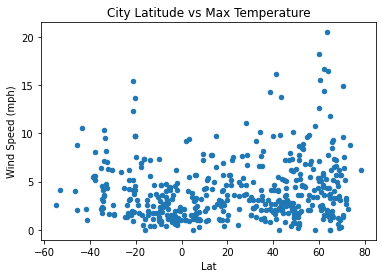

<IPython.core.display.Javascript object>

In [39]:
lat_vs_wind = df_clean.plot(
    x="Lat",
    y=" Wind Speed",
    kind="scatter",
    title="City Latitude vs Max Temperature",
    ylabel="Wind Speed (mph)",
)
plt.savefig("../output_data/plot4.png")

The r-squared is: 0.713283991487818


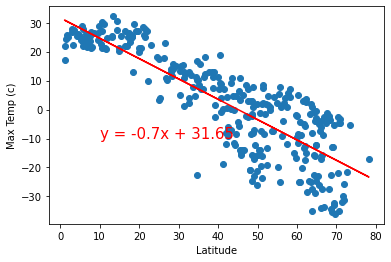

<IPython.core.display.Javascript object>

In [28]:
df_clean_n = df_clean.loc[df["Lat"] > 0, :]
x_values = df_clean_n["Lat"]
y_values = df_clean_n["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10, -10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (c)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.3036441654081002


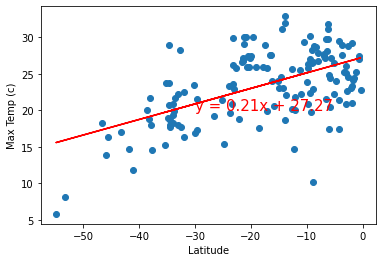

<IPython.core.display.Javascript object>

In [29]:
df_clean_s = df_clean.loc[df["Lat"] < 0, :]
x_values = df_clean_s["Lat"]
y_values = df_clean_s["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-30, 20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (c)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.05413221617390951


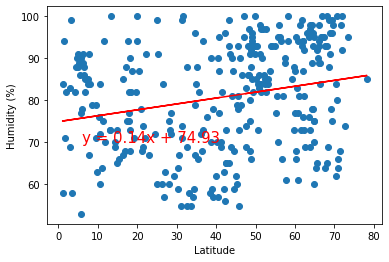

<IPython.core.display.Javascript object>

In [30]:
df_clean_n = df_clean.loc[df["Lat"] > 0, :]
x_values = df_clean_n["Lat"]
y_values = df_clean_n["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6, 70), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.014806504830937721


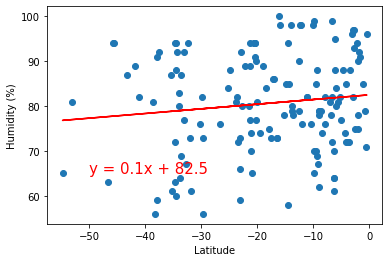

<IPython.core.display.Javascript object>

In [31]:
df_clean_s = df_clean.loc[df["Lat"] < 0, :]
x_values = df_clean_s["Lat"]
y_values = df_clean_s["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50, 65), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.08310850612576796


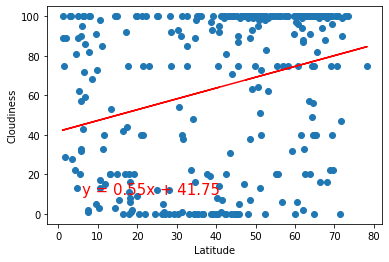

<IPython.core.display.Javascript object>

In [32]:
df_clean_n = df_clean.loc[df["Lat"] > 0, :]
x_values = df_clean_n["Lat"]
y_values = df_clean_n["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6, 10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.10779075710380308


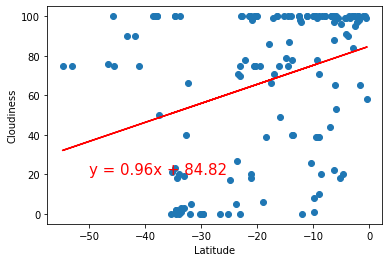

<IPython.core.display.Javascript object>

In [33]:
df_clean_s = df_clean.loc[df["Lat"] < 0, :]
x_values = df_clean_s["Lat"]
y_values = df_clean_s["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50, 20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.031978891826780584


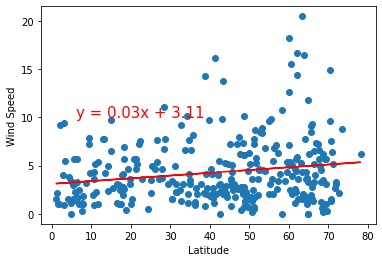

<IPython.core.display.Javascript object>

In [34]:
df_clean_n = df_clean.loc[df["Lat"] > 0, :]
x_values = df_clean_n["Lat"]
y_values = df_clean_n[" Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6, 10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.1144048846561878


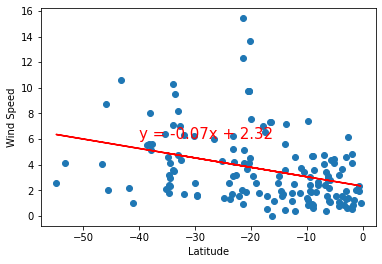

<IPython.core.display.Javascript object>

In [35]:
df_clean_s = df_clean.loc[df["Lat"] < 0, :]
x_values = df_clean_s["Lat"]
y_values = df_clean_s[" Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-40, 6), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()